In this notebook, I show how to use the LAMBDA Online Tool to generate custom CMB maps that can then be incorporated into any MAPSIM simulation.

First, one visits the LAMBDA CAMB Tool Website: https://lambda.gsfc.nasa.gov/toolbox/camb_online.html

One can then customize the parameters, which are explained briefly in the CMB Summer School website I wrote with a colleague: https://sites.google.com/cornell.edu/cmb-notebooks-supplement/notebook-1-introduction-to-data-analysis-techniques-for-cmb-maps?authuser=0 

After clicking the "GO!" box at the bottom of the page to load the power spectra, download the .fits file on the page and follow the code below to see how to incorporate the CMB map into the repository used for the simulations. 

In [2]:
import sys
(sys.path).insert(1,'/nfs/grp/cosmo/pedro/ccat_mapsims_to_publish') #change to path for the downloaded module

import os

import mapsims
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import healpy as hp
import matplotlib
from matplotlib import pyplot as plt
from pixell import enmap, enplot, reproject, utils, curvedsky
from ad_fns import *
from astropy.io import fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

The .fits file downloaded from LAMBDA should look something like 'camb_XXXXXXXX_scalcls.fits'. All that is left to do is convert the cls outputed by the website into alms used by MAPSIMS. 

In [4]:
filename = '/nfs/grp/cosmo/pedro/ccat_mapsims_to_publish/ccat_models/test/camb_16723396_scalcls.fits'
ind = 1
hdul = hp.read_cl(filename)[:,:-1]
hdul_alm = hp.synalm(hdul, new=True)
hp.write_alm('/nfs/grp/cosmo/pedro/ccat_mapsims_to_publish/mapsims/tests/data/fullskyUnlensedUnabberatedCMB_alm_set00_0000'+str(ind)+'.fits',hdul_alm)
hdul_cl = hp.alm2cl(hdul_alm)

Note that the ind integer labels the CMB map to be used when we load the Precomputed CMB object. So, it is important to keep track of which maps are what and make sure you adjust the num attribute just like below to correspond to the right map. 

In [5]:
cmb = mapsims.SOPrecomputedCMB(
        num=ind,
        nside=512,
        lensed=False,
        aberrated=False,
        has_polarization=True,
        cmb_set=0,
        cmb_dir="/nfs/grp/cosmo/pedro/ccat_mapsims_to_publish/mapsims/tests/data",
        input_units="uK_CMB",
    )

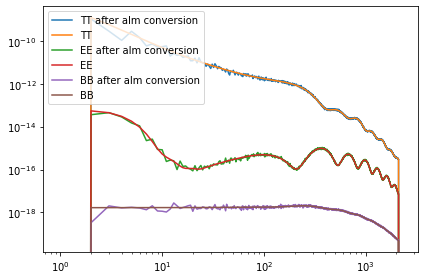

In [6]:
plt.clf()
plt.rcParams["figure.figsize"] = (10,7)
pols = ["TT","EE","BB"]
for i in np.arange(3):
    plt.plot(hp.alm2cl(cmb.alm)[i],label = pols[i]+ " after alm conversion")
    plt.plot(hdul[i], label = pols[i])
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()
